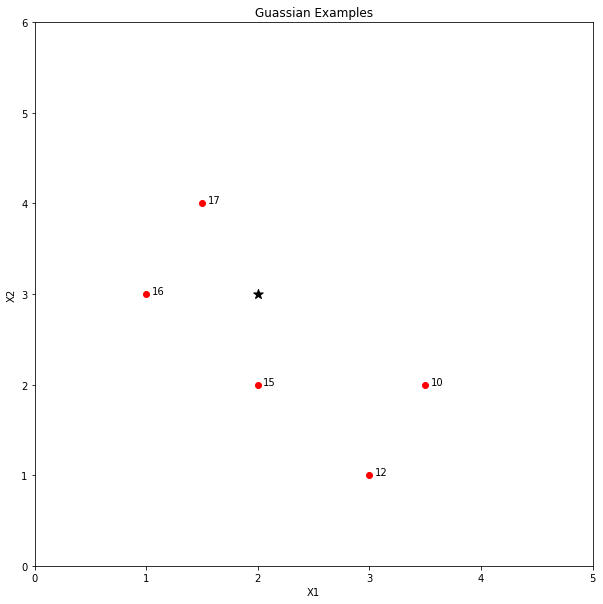

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x1 = [1, 2, 1.5, 3, 3.5]
x2 = (3, 2, 4, 1, 2)
y = (16, 15, 17, 12, 10)

fig, ax = plt.subplots()
cm = ax.scatter(x1, x2, c="r") #, c=y)

for i, txt in enumerate(y):
    ax.annotate(txt, (x1[i]+0.05,x2[i]))
    
ax.scatter(2,3, c="k", marker="*", s=100)


plt.ylim((0,6))
plt.xlim((0,5))

ax.set_ylabel("X2")
ax.set_xlabel("X1")
ax.set_title("Guassian Examples")

fig.set_size_inches((10,10))
plt.show()

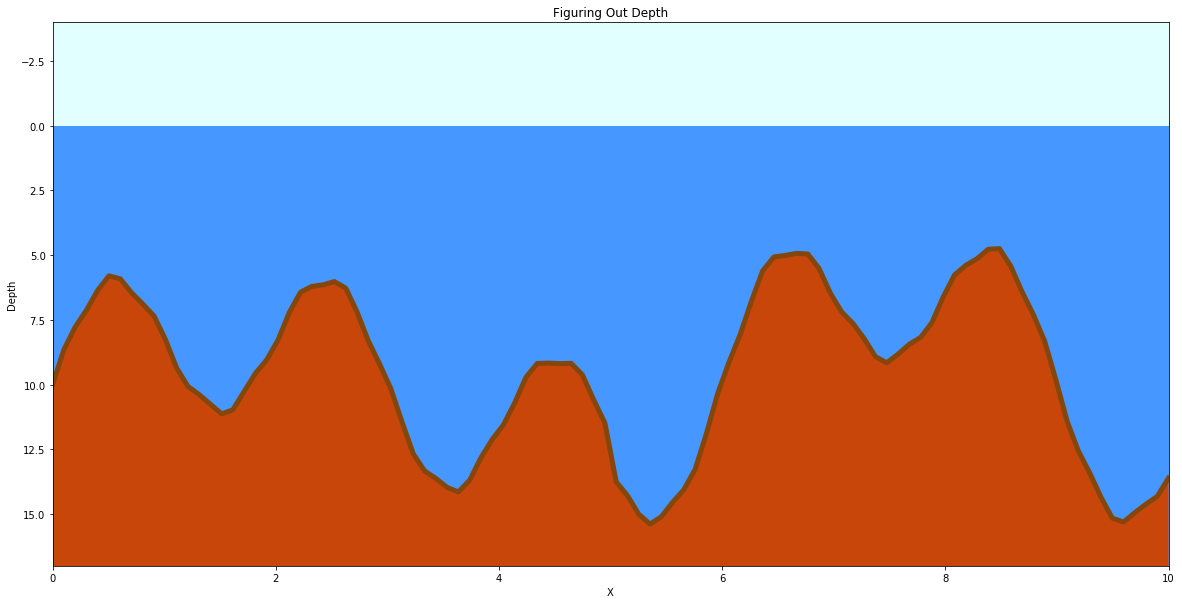

In [2]:
c_water = np.array((70,151,255))/255.0
c_air = np.array((225,255,255))/255.0
c_sea_floor = np.array((132,70,11))/255.0
c_dirt = np.array((201,70,11))/255.0
np.random.seed(0)

X = np.linspace(0, 10, 100)
f = lambda x: 10 - 2*(np.sin(np.pi/3 * x) + 1.5*np.sin(np.pi * x) + 0.1*np.sin(15*x) + (np.sin(np.pi/3 * x) if x > 5 else 0))
y = np.array([f(x) for x in X])


fig, ax = plt.subplots()
ax.fill_between(X, -15, 20, facecolor=c_air)
ax.fill_between(X, 0, 20, facecolor=c_water)
ax.plot(X,y, linewidth=5, c=c_sea_floor)
ax.fill_between(X, y, 20, facecolor=c_dirt)

ax.set_ylabel("Depth")
ax.set_xlabel("X")
ax.set_title("Figuring Out Depth")

plt.xlim((0,10))
plt.ylim((17,-4))
fig.set_size_inches((20,10))
plt.show()

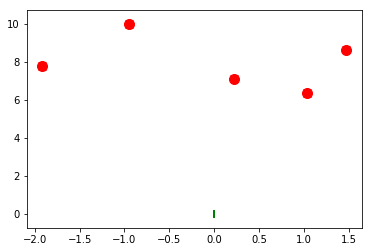

In [3]:
np.random.seed(0)
X = np.linspace(-2.0, 2.0, 100)
np.random.shuffle(X)
X = X[0:5]
Y = np.sin(X) + np.random.normal(0,0.1)
for i, x in enumerate(X):
    plt.errorbar(x, y[i], linewidth=1, marker='o', ms=10, capsize=4, yerr=0.2, c='r', zorder=100)
new_x = [0]
plt.errorbar(new_x, 0, linewidth=2, marker='o', ms=0, capsize=0, yerr=0.2, c='g', zorder=100)
plt.show()


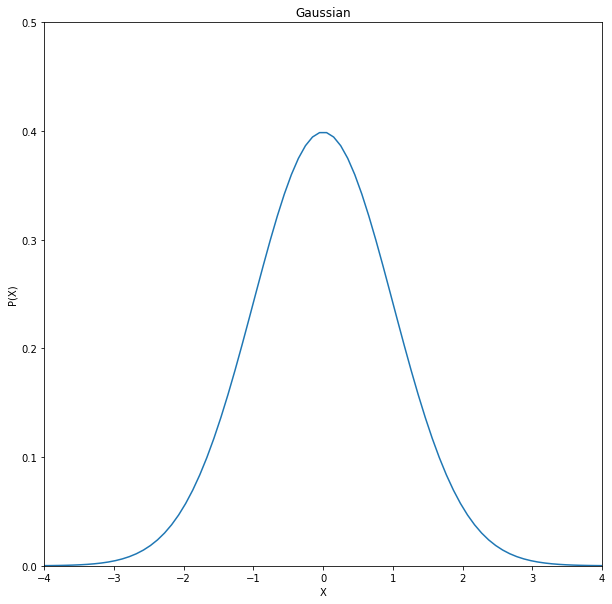

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x,mlab.normpdf(x, mu, sigma))
ax.set_ylabel("P(X)")
ax.set_xlabel("X")
ax.set_title("Gaussian")

plt.xlim((-4,4))
plt.ylim((0,0.5))
fig.set_size_inches((10,10))
plt.show()

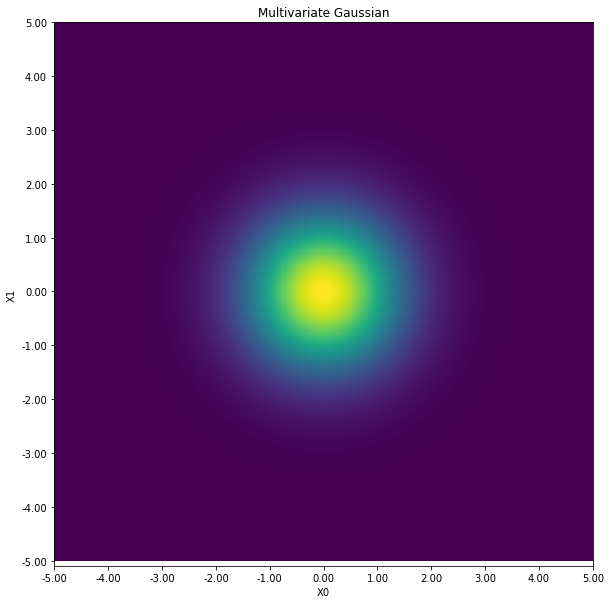

In [50]:
def gkern(mu, sigma, im_size=512, num_std = (5,5)):
    

    def gkern(mu, sigma, im_size, x0_space, x1_space):
        xx_0, xx_1 = np.meshgrid(x0_space, x1_space)
        pos = np.array([xx_0,xx_1]).T
        n = 2
        Sigma_det = np.linalg.det(sigma)
        Sigma_inv = np.linalg.inv(sigma)
        N = np.sqrt((2*np.pi)**n * Sigma_det)
        fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
        return np.exp(-fac / 2) / N

    
    mask = np.zeros((im_size, im_size))
    x0_range = mu[0]-num_std[0]*sigma[0,0],mu[0]+num_std[0]*sigma[0,0]
    x0_space = np.linspace(x0_range[0], x0_range[1],im_size)
    x1_range = mu[1]-num_std[1]*sigma[1,1],mu[1]+num_std[1]*sigma[1,1]
    x1_space = np.linspace(x1_range[0], x1_range[1],im_size)
                          
    mask = mask + gkern(mu, sigma, im_size, x0_space, x1_space)
    return mask


im_size = 512
mu = np.array([0,0])
sigma = np.array([[1,0],[0,1]])
num_std = (5,5)

fig, ax = plt.subplots()
gaussian_image = gkern(mu, sigma, im_size, num_std)
plt.ylim((-num_std[1]*sigma[1,1],num_std[1]*sigma[1,1]))
ax.imshow(gaussian_image)
ax.set_xticks(np.linspace(0,im_size,11))
ax.set_yticks(np.linspace(0,im_size,11))
ax.set_xticklabels(map(lambda x: "{:0.2f}".format(x),np.linspace(-num_std[0]*sigma[0,0], num_std[0]*sigma[0,0],11)))
ax.set_yticklabels(map(lambda x: "{:0.2f}".format(x),np.linspace(-num_std[1]*sigma[1,1], num_std[1]*sigma[1,1],11)))

ax.set_ylabel("X1")
ax.set_xlabel("X0")
ax.set_title("Multivariate Gaussian")
# plt.xlim((-5,5))
# plt.ylim((0,0.5))
fig.set_size_inches((10,10))
plt.show()